In [1]:
%matplotlib notebook
%load_ext autoreload
%autoreload 2


import numpy as np
import sys
sys.path.append('../VideoPose3D/')
from custom_run import *
from ipywidgets import interact
import ipywidgets as widgets

import matplotlib.pyplot as plt
import matplotlib.cm as cm
from mpl_toolkits.mplot3d import Axes3D
from mpl_toolkits.mplot3d import proj3d
from matplotlib import collections  as mc
import numpy as np
import cv2

from lib.vizualisation import PoseViewer, AnglePlot, PosePlot, VideoPlot, DualPoseViewer
from lib.pose import Pose
from lib.preprocessing import *
from lib.utils import *


Bad key savefig.frameon in file /home/david/anaconda3/lib/python3.7/site-packages/matplotlib/mpl-data/stylelib/_classic_test.mplstyle, line 421 ('savefig.frameon : True')
You probably need to get an updated matplotlibrc file from
https://github.com/matplotlib/matplotlib/blob/v3.3.3/matplotlibrc.template
or from the matplotlib source distribution

Bad key verbose.level in file /home/david/anaconda3/lib/python3.7/site-packages/matplotlib/mpl-data/stylelib/_classic_test.mplstyle, line 472 ('verbose.level  : silent      # one of silent, helpful, debug, debug-annoying')
You probably need to get an updated matplotlibrc file from
https://github.com/matplotlib/matplotlib/blob/v3.3.3/matplotlibrc.template
or from the matplotlib source distribution

Bad key verbose.fileo in file /home/david/anaconda3/lib/python3.7/site-packages/matplotlib/mpl-data/stylelib/_classic_test.mplstyle, line 473 ('verbose.fileo  : sys.stdout  # a log filename, sys.stdout or sys.stderr')
You probably need to get an upd

In [3]:
model = get_model('../VideoPose3D/checkpoint/pretrained_h36m_detectron_coco.bin')

In [17]:
dataset1 = 'datasets/data_cut_6.npz'
dataset2 = 'data_2d_custom_federer.npz'

In [18]:
video_path1 = 'videos_tennis/cut_6.mov'
video_path2 = 'videos_tennis/federer_cut.mp4'

In [19]:
joints1 = predict_from_dataset(model, dataset1)
joints2 = predict_from_dataset(model, dataset2)

In [20]:
poses1 = [Pose(joints_in_frame) for joints_in_frame in joints1]
poses2 = [Pose(joints_in_frame) for joints_in_frame in joints2]

In [26]:
resize_factor1 = 0.25
resize_factor2 = 0.5

frames1 = get_video_frames(video_path1, resize_factor=resize_factor1)
frames2 = get_video_frames(video_path2, resize_factor=resize_factor2)

In [27]:
padding, min_dist_idx1, min_dist_idx2 = get_padding_for_alignment(
    frames1, 
    frames2, 
    get_keypoints(dataset1), 
    get_keypoints(dataset2), 
    resize_factor1,
    resize_factor2
)

In [28]:
if min_dist_idx1 < min_dist_idx2:
    frames1 = pad_frames(frames1, padding)
    poses1 = pad_poses(poses1, padding)
else:
    frames2 = pad_frames(frames2, padding)
    poses2 = pad_poses(poses2, padding)    

In [29]:
dual_pose_viewer = DualPoseViewer(poses1, poses2, frames1, frames2)

<IPython.core.display.Javascript object>


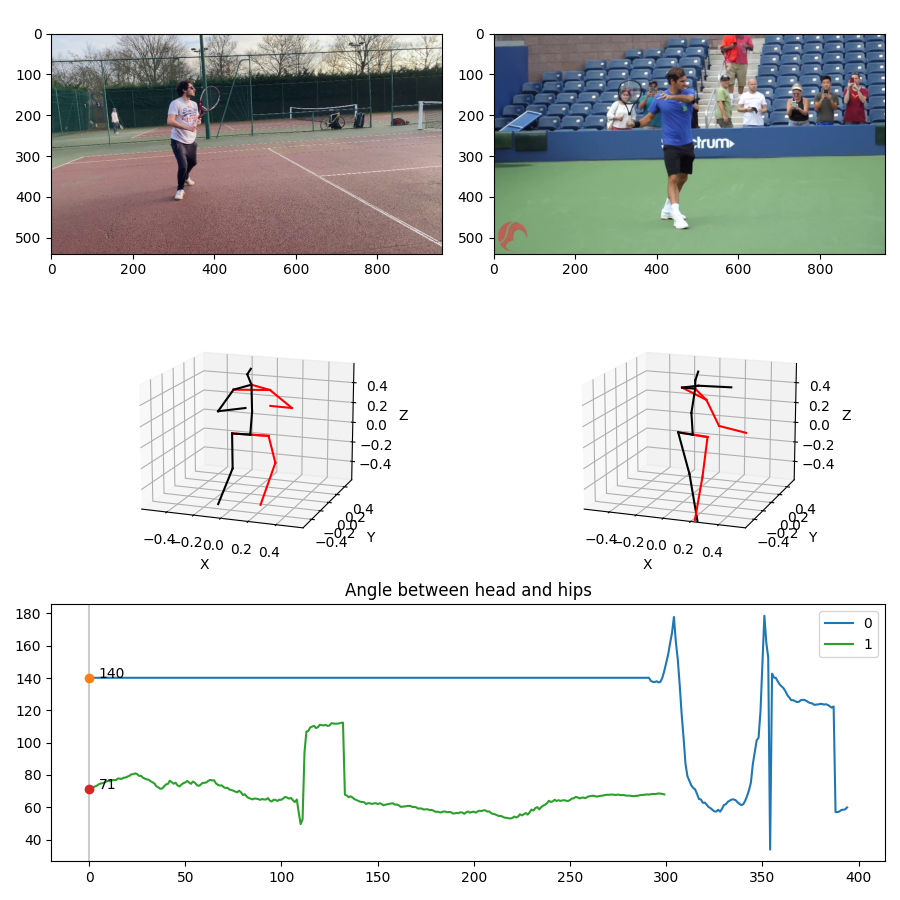

interactive(children=(IntSlider(value=0, description='x', layout=Layout(width='500px'), max=394), Output()), _…

In [30]:
dual_pose_viewer.plot([('head', 'hips')])